In [14]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)
library(glue)

pcolors = c("#FFBE0B", "#FF006E", "#8338EC", "#5A96FF", "#880D1E", "#4CC9F0")

In [15]:
# 31s à s'exécuter sur Stuart
data_full_dir = "../data/donnees-synop-essentielles-omm.csv"
# 9s à s'exécuter sur stuart
data_ext10_dir = "../data/donnees_extracted_10.csv"
data_ext10M_dir = "../data/donnees_extracted_metro_10.csv"

full_data <- read.csv(data_full_dir, 
            sep=";", # à toggle en fonction du fichier (',' pour les extracts, ';' pour l'originel)
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

## Critère : latitude et longitude

In [16]:
# extract latitudes and longitude
geo_data <- full_data[, c("ID.OMM.station", "Latitude", "Longitude")]
# make it unique
geo_data <- geo_data[!duplicated(geo_data), ]
# replace names of rows by station id
row.names(geo_data) <- geo_data$ID.OMM.station
# and delete column
geo_data <- geo_data[, -which(names(geo_data) == "ID.OMM.station")]
print(geo_data)

Warning message:
“non-unique values when setting 'row.names': ‘7471’, ‘7535’”


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


[1]   1.588858   4.276188   7.196007  11.166709  16.770381  18.617060  46.691181
[8] 184.231928 329.184445


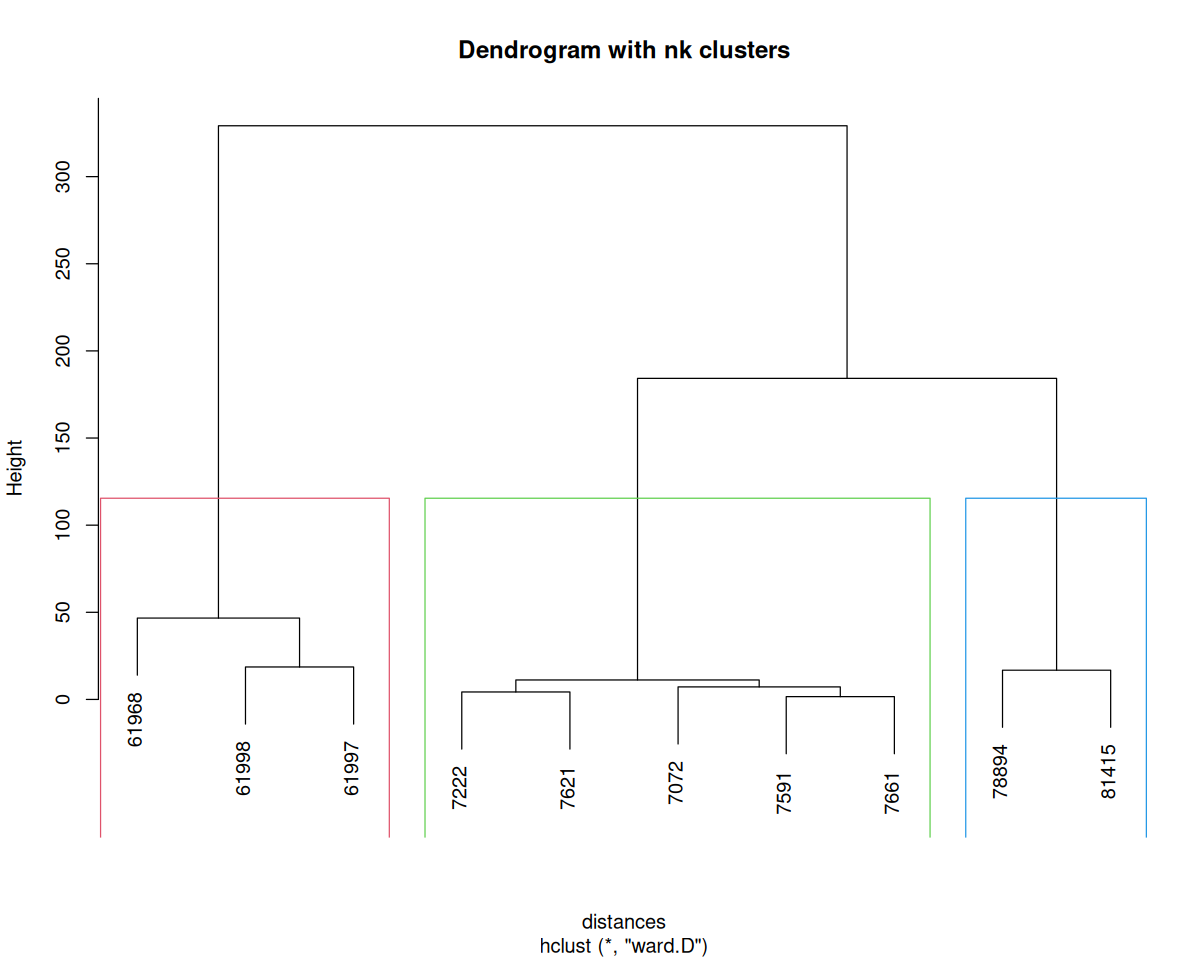

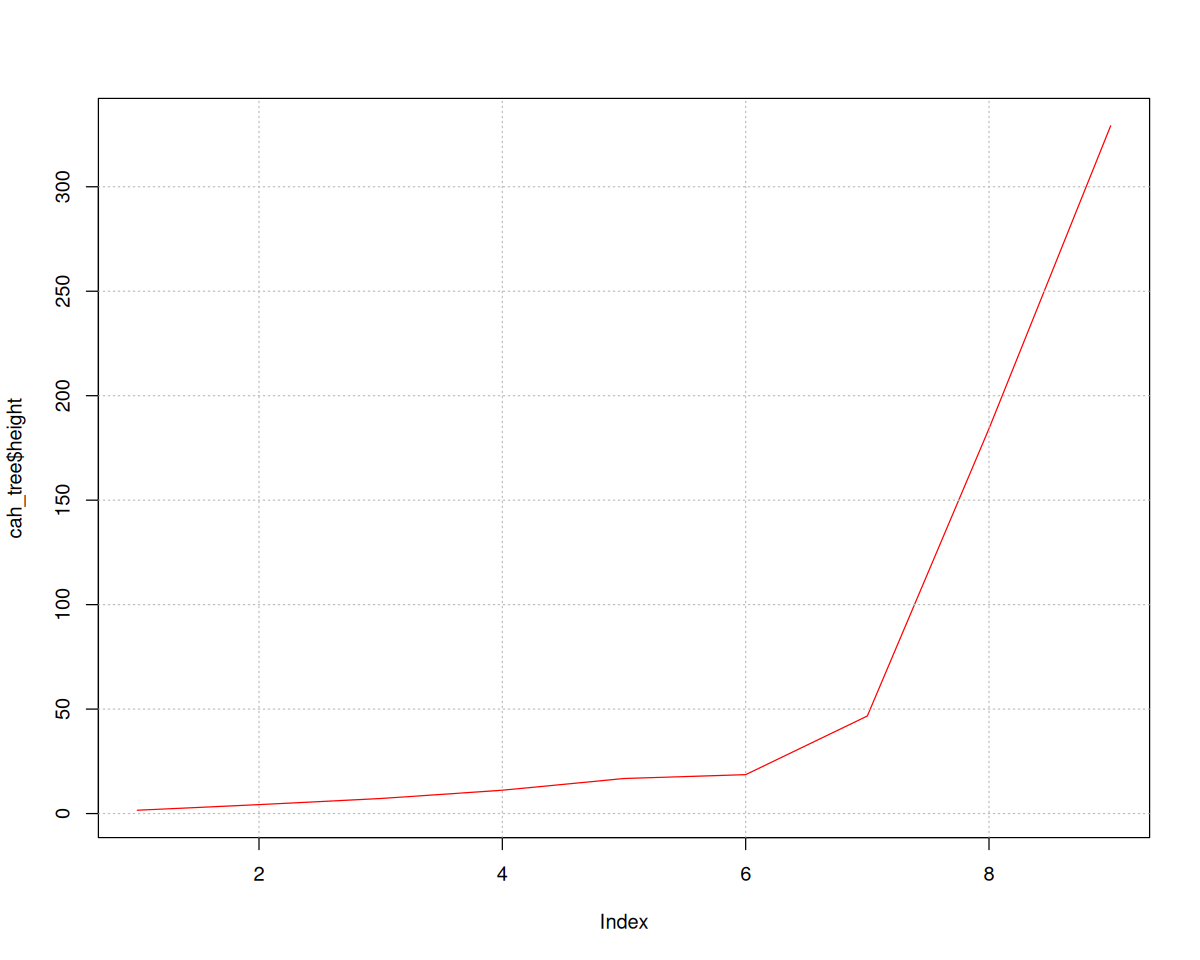

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)

nk = 3
# distances
distances <- dist(geo_data)
# la distance par défaut est 'complete', ie maximale.

# plot dendrogramme et sépare l'arbre
cah_tree <- hclust(distances, method="ward.D")
clusters <- cutree(cah_tree, k = nk, h = NULL)
par(bg = 'white')
plot(cah_tree, main = "Dendrogram with nk clusters")
rectlist = rect.hclust(cah_tree, k = nk, border = 2:(nk+1))

# plot la hauteur en fonction du nombre de groupe
print(cah_tree$height)
par(bg = 'white')
plot(cah_tree$height, col='red', type='l')
grid(col="gray")


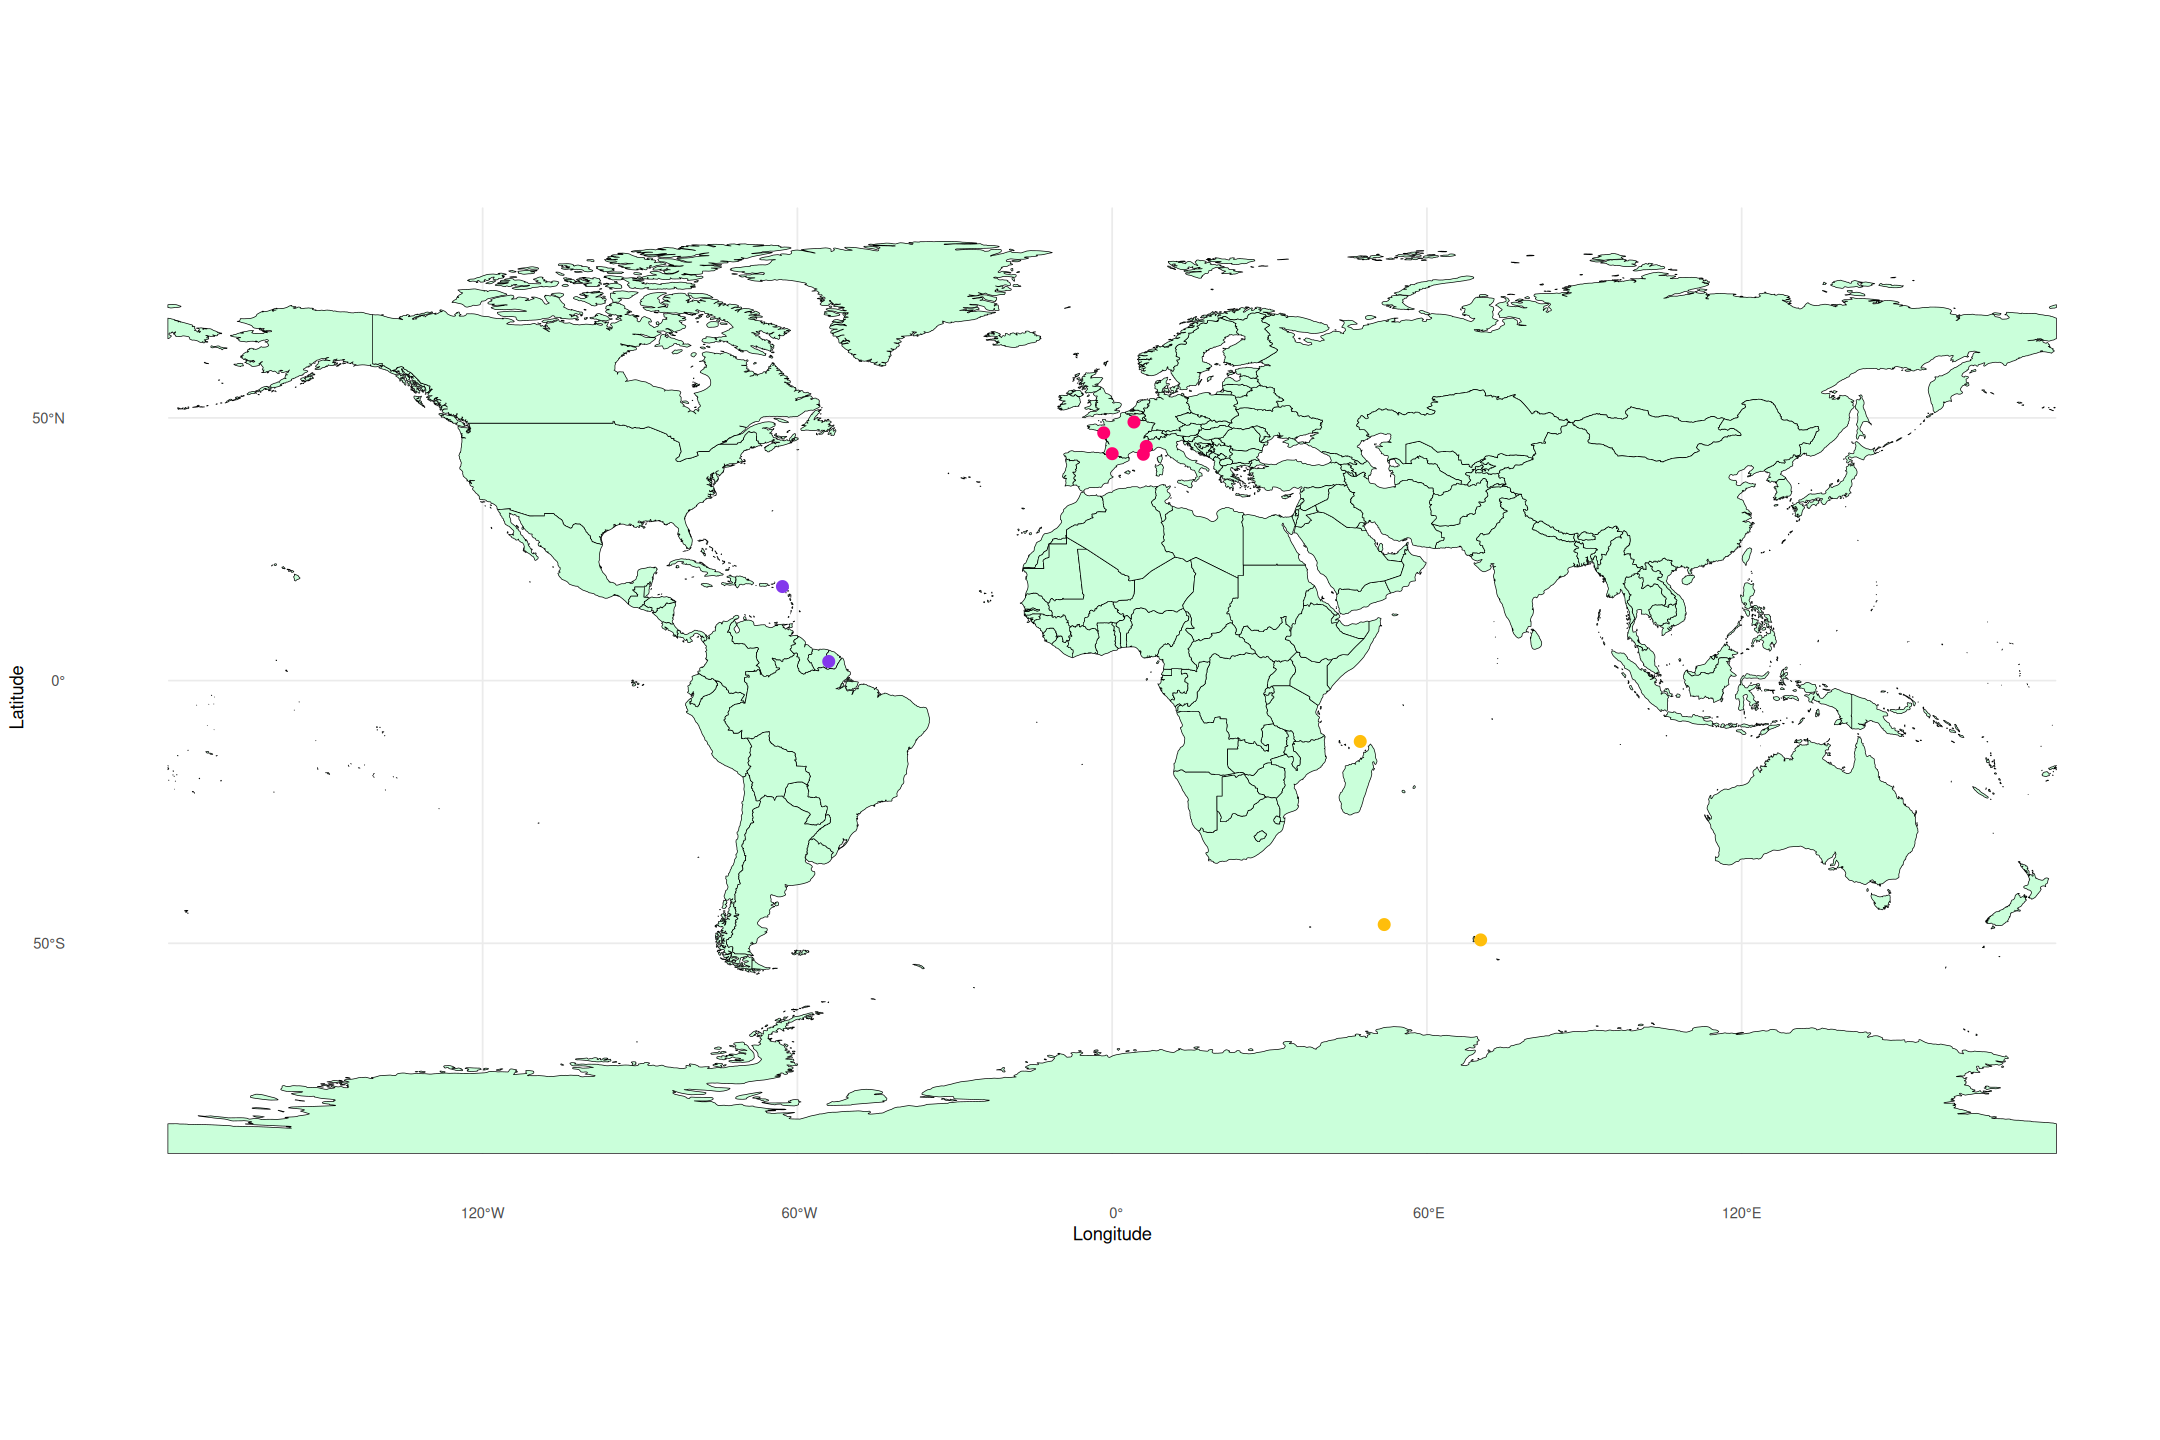

In [ ]:
# en bleu, le groupe 1
# en rouge, le groupe 2
options(repr.plot.width=18, repr.plot.height=12)
worldmap <- ne_countries(scale = 'medium', type = 'map_units', returnclass = 'sf')

i <- 1
p <- ggplot()
p <- p + geom_sf(data = worldmap, color = "black", fill = "#CAFFDA")
for(v in rectlist){
    p <- p + geom_point(data = geo_data[rownames(geo_data) %in% names(v), ], 
              aes(x = Longitude, y = Latitude), color = pcolors[[i]], size = 3)
  i <- (i+1)%%4
}
p <- p + coord_sf() + theme_minimal()
print(p)


## Critère : Température

## Critère : Nébulosité